## Observations and Insights 

1. Out of the 10 drugs tested, the drug which resulted in the lowest average tumor size was Ramicane, which also offered the lowest variance in the results suggesting that this is the most effective treatment method based on the data in this sample.

2. Each drug was tested on 25 different mice, except for Propriva and Stelasyn which had 24 test subjects giving a total of 248 mice (excluding the mice which had duplicate data). The sex of the mice was evenly distributed with with 51% male and 49% female.

3. There is a strong positive correlation between the weight of the mouse and the average volume of the tumor. This suggests that the heavier a mouse is, the larger it's tumor will grow on average.

In [1]:
# Written by Matt Taylor
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = len(combined_data["Mouse ID"].value_counts())
print(f"The number of mice is {number_of_mice}")

The number of mice is 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_times = combined_data.groupby(["Timepoint", "Mouse ID"]).count()
grouped_times = grouped_times.loc[grouped_times["Sex"] > 1, :].reset_index
duplicate_ID = grouped_times().iloc[0,1]
duplicate_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID_data = combined_data.loc[combined_data["Mouse ID"] == duplicate_ID, :]
duplicate_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_index = duplicate_ID_data.index
combined_data_clean = combined_data.drop(duplicate_index)
combined_data_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(combined_data_clean["Mouse ID"].value_counts())
print(f"The number of mice is {number_of_mice}")

The number of mice is 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
groupby_object = combined_data_clean.groupby("Drug Regimen")

mean_volume = groupby_object.mean()
mean_volume = mean_volume["Tumor Volume (mm3)"]

median_volume = groupby_object.median()
median_volume = median_volume["Tumor Volume (mm3)"]

var_volume = groupby_object.var()
var_volume = var_volume["Tumor Volume (mm3)"]

stdev_volume = groupby_object.std()
stdev_volume = stdev_volume["Tumor Volume (mm3)"]

sem_volume = groupby_object.sem()
sem_volume = sem_volume["Tumor Volume (mm3)"]

drug_names = mean_volume.index

summary_table = pd.DataFrame(zip(mean_volume, median_volume, var_volume, stdev_volume, sem_volume), columns = ["Mean Tumor Volume", "Median Tumor Volume", "Variance Tumor Volume", "Std Dev Tumor Volume", "SEM Tumor Volume"]).set_index(drug_names)
summary_table

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std Dev Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

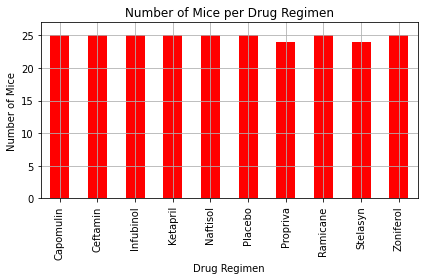

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
num_mice_per_treatment = combined_data_clean.groupby(["Mouse ID", "Drug Regimen"]).count().reset_index().groupby("Drug Regimen").count()
num_mice_per_treatment = num_mice_per_treatment["Mouse ID"]
num_mice_per_treatment.plot(kind = "bar", grid = True, color = "red")

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0, 27)
plt.tight_layout()
plt.show()

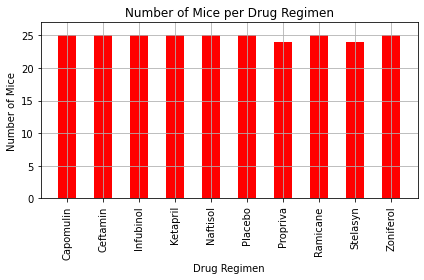

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(drug_names, num_mice_per_treatment, color = "red", width = 0.5)
plt.grid()
plt.xticks(rotation="vertical")

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.ylim(0, 27)
plt.tight_layout()
plt.show()

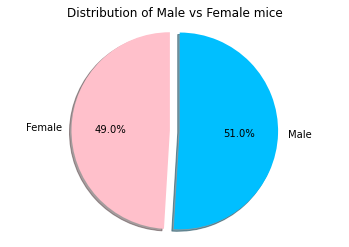

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = combined_data_clean.groupby("Sex").count()
gender_count = gender_count["Mouse ID"]

explode = (0, 0.1)
gender_count.plot(kind = "pie", shadow = True, autopct="%1.1f%%", colors = ["pink", "deepskyblue"], startangle = 90, explode = explode)

plt.title("Distribution of Male vs Female mice")
plt.ylabel("")
plt.axis("equal")
plt.show()

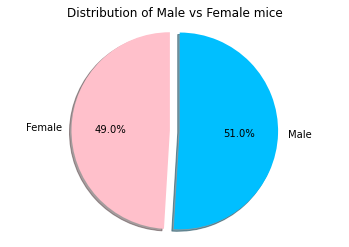

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0, 0.1)
plt.pie(gender_count, shadow = True, autopct="%1.1f%%", colors = ["pink", "deepskyblue"], startangle = 90, labels = ["Female", "Male"], explode = explode)

plt.title("Distribution of Male vs Female mice")
plt.ylabel("")
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Filtering the initial Dataframe to only contain the four treatments of interest, and sorting the values
combined_data_filtered = combined_data_clean.loc[combined_data_clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]), :].sort_values(["Mouse ID", "Timepoint"], ascending = False)

# Setting up variables and lists to figure out the position of the final volume of each mouse
index_list = [0]
current_mouse = combined_data_filtered.iloc[1, 0]
x = 0

# Looping through the data to find the position of each new mouse (not all mice have a final timepoint of 45, so need to find where the Mouse ID changes)
while x < len(combined_data_filtered["Mouse ID"]):
    if combined_data_filtered.iloc[x, 0] == current_mouse:
        x += 1
    else:
        current_mouse = combined_data_filtered.iloc[x, 0]
        index_list.append(x)
        x += 1

# Resetting the index and filtering based off the new index list
combined_data_filtered.reset_index(inplace = True, drop = True)
combined_data_filtered = combined_data_filtered.loc[index_list]

# Splitting the data into four seperate dataframes for graphing
capomulin_data = combined_data_filtered.loc[combined_data_filtered["Drug Regimen"] == "Capomulin", :]

ramicane_data = combined_data_filtered.loc[combined_data_filtered["Drug Regimen"] == "Ramicane", :]

infubinol_data = combined_data_filtered.loc[combined_data_filtered["Drug Regimen"] == "Infubinol", :]

ceftamin_data = combined_data_filtered.loc[combined_data_filtered["Drug Regimen"] == "Ceftamin", :]

In [13]:
# Calculate the IQR for Capomulin and quantitatively determine if there are any potential outliers. 
quartiles = capomulin_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
upper_quartile = quartiles[0.75]
lower_quartile = quartiles[0.25]
iqr = upper_quartile - lower_quartile

# Calculating the upper and lower bounds for potential outliers
upper_bound = upper_quartile + (1.5 * iqr)
lower_bound = lower_quartile - (1.5 * iqr)
print(f"Any values above {round(upper_bound,2)} or below {round(lower_quartile,2)} may be an outlier")

# Determine outliers using upper and lower bounds
outliers = capomulin_data.loc[(capomulin_data["Tumor Volume (mm3)"] > upper_bound) | (capomulin_data["Tumor Volume (mm3)"] < lower_bound), :]
print(f"The number of outliers in the final tumor volume is {len(outliers)}")

Any values above 51.83 or below 32.38 may be an outlier
The number of outliers in the final tumor volume is 0


In [14]:
# Calculate the IQR for Ramicane and quantitatively determine if there are any potential outliers. 
quartiles = ramicane_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
upper_quartile = quartiles[0.75]
lower_quartile = quartiles[0.25]
iqr = upper_quartile - lower_quartile

# Calculating the upper and lower bounds for potential outliers
upper_bound = upper_quartile + (1.5 * iqr)
lower_bound = lower_quartile - (1.5 * iqr)
print(f"Any values above {round(upper_bound,2)} or below {round(lower_quartile,2)} may be an outlier")

# Determine outliers using upper and lower bounds
outliers = ramicane_data.loc[(ramicane_data["Tumor Volume (mm3)"] > upper_bound) | (ramicane_data["Tumor Volume (mm3)"] < lower_bound), :]
print(f"The number of outliers in the final tumor volume is {len(outliers)}")

Any values above 54.31 or below 31.56 may be an outlier
The number of outliers in the final tumor volume is 0


In [15]:
# Calculate the IQR for Infubinol and quantitatively determine if there are any potential outliers. 
quartiles = infubinol_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
upper_quartile = quartiles[0.75]
lower_quartile = quartiles[0.25]
iqr = upper_quartile - lower_quartile

# Calculating the upper and lower bounds for potential outliers
upper_bound = upper_quartile + (1.5 * iqr)
lower_bound = lower_quartile - (1.5 * iqr)
print(f"Any values above {round(upper_bound,2)} or below {round(lower_quartile,2)} may be an outlier")

# Determine outliers using upper and lower bounds
outliers = infubinol_data.loc[(infubinol_data["Tumor Volume (mm3)"] > upper_bound) | (infubinol_data["Tumor Volume (mm3)"] < lower_bound), :]
print(f"The number of outliers in the final tumor volume is {len(outliers)}")

Any values above 82.74 or below 54.05 may be an outlier
The number of outliers in the final tumor volume is 1


In [16]:
# Calculate the IQR for Ceftamin and quantitatively determine if there are any potential outliers. 
quartiles = ceftamin_data["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
upper_quartile = quartiles[0.75]
lower_quartile = quartiles[0.25]
iqr = upper_quartile - lower_quartile

# Calculating the upper and lower bounds for potential outliers
upper_bound = upper_quartile + (1.5 * iqr)
lower_bound = lower_quartile - (1.5 * iqr)
print(f"Any values above {round(upper_bound,2)} or below {round(lower_quartile,2)} may be an outlier")

# Determine outliers using upper and lower bounds
outliers = ceftamin_data.loc[(ceftamin_data["Tumor Volume (mm3)"] > upper_bound) | (ceftamin_data["Tumor Volume (mm3)"] < lower_bound), :]
print(f"The number of outliers in the final tumor volume is {len(outliers)}")

Any values above 87.67 or below 48.72 may be an outlier
The number of outliers in the final tumor volume is 0


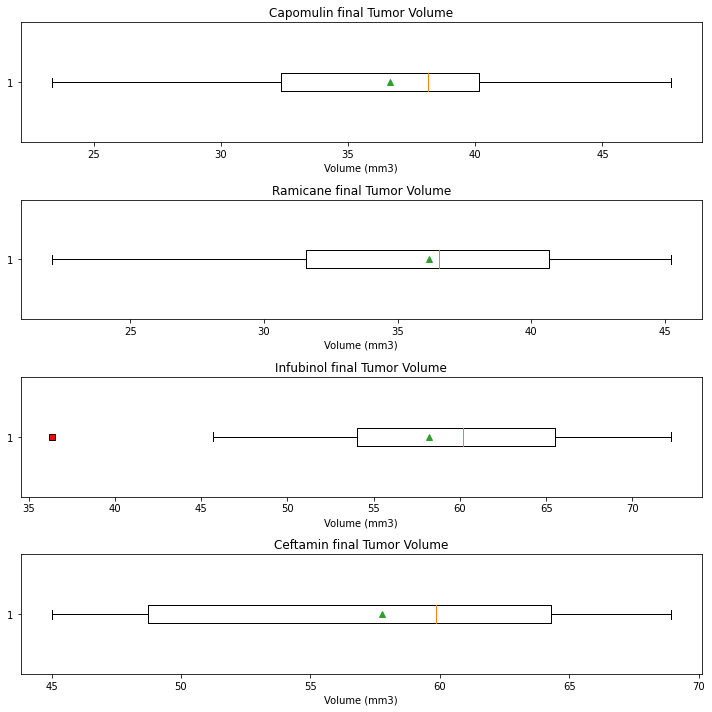

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,10))

red_square = dict(markerfacecolor='r', marker='s')

ax1.boxplot(capomulin_data["Tumor Volume (mm3)"], vert = False, showmeans = True, flierprops=red_square)
ax1.set_title("Capomulin final Tumor Volume")
ax1.set_xlabel("Volume (mm3)")

ax2.boxplot(ramicane_data["Tumor Volume (mm3)"], vert = False, showmeans = True, flierprops=red_square)
ax2.set_title("Ramicane final Tumor Volume")
ax2.set_xlabel("Volume (mm3)")

ax3.boxplot(infubinol_data["Tumor Volume (mm3)"], vert = False, showmeans = True, flierprops=red_square)
ax3.set_title("Infubinol final Tumor Volume")
ax3.set_xlabel("Volume (mm3)")

ax4.boxplot(ceftamin_data["Tumor Volume (mm3)"], vert = False, showmeans = True, flierprops=red_square)
ax4.set_title("Ceftamin final Tumor Volume")
ax4.set_xlabel("Volume (mm3)")

plt.tight_layout()
plt.show()

## Line and Scatter Plots

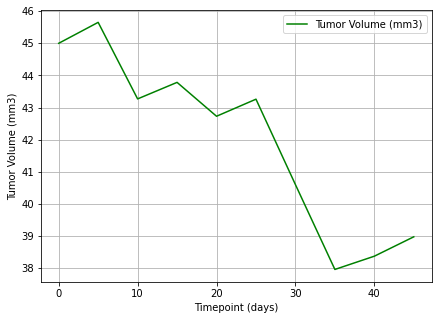

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = combined_data_clean.loc[combined_data_clean["Mouse ID"] == "b128", :]
capomulin_mouse = capomulin_mouse[["Timepoint", "Tumor Volume (mm3)"]].set_index("Timepoint").plot(kind="line", color = "green", grid = True, figsize = (7, 5))
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.show()

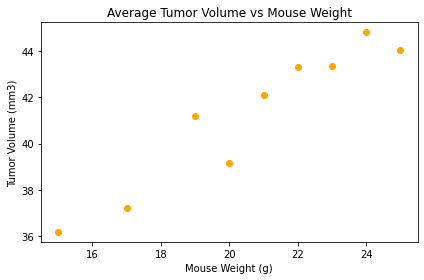

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_weight = combined_data_clean.loc[combined_data_clean["Drug Regimen"] == "Capomulin", :]
avg_tumor_volume = capomulin_weight.groupby("Weight (g)").mean()
avg_tumor_volume.reset_index(inplace = True)

weight = avg_tumor_volume["Weight (g)"]
volume = avg_tumor_volume["Tumor Volume (mm3)"]
plt.scatter(weight, volume, color = "orange")

plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.tight_layout()
plt.show()

## Correlation and Regression

The correlation coefficient for the model is 0.95



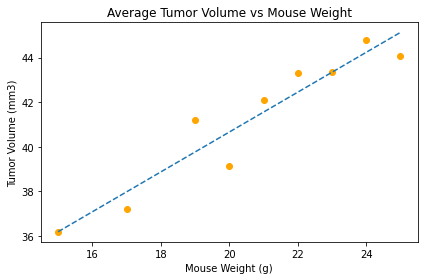

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, r, p, sem) = st.linregress(weight, volume)
lin_equation = slope * weight + intercept

plt.scatter(weight, volume, color = "orange")
plt.plot(weight, lin_equation, "--")

plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

print(f"The correlation coefficient for the model is {round(r, 2)}\n")
plt.tight_layout()
plt.show()